In [42]:
from sklearn.datasets import load_wine

In [43]:
wine = load_wine()

In [44]:
print(wine.DESCR)

# class 0, 1, 2로 멀티클래스다

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [45]:
x = wine.data
y = wine.target

In [46]:
x.shape, y.shape

((178, 13), (178,))

### 조건 : Functional API 다중분류 연습
1. training set / test set / validation set 구분하기! - 전처리 파트 >> 이렇게 데이터가 적은데 (178개) 20퍼센트나 뚝 데가도 되는건가? 학습데이터가 충분해 그럼? >> 10 % 로 줄랭 ㅎ
2. scaling (min-max, standardiztion 둘 중!) - 전처리 파트
3. y에 대한 전처리 - 전처리 파트
4. 히든 레이어 최소 2개 쓰기 (노드와 액티베이션 자유!) - 모델링 파트
5. early stopping, validation_data - 모델링 파트

In [47]:
# 1. training set/ test set / validation set 구분하기
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2023)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=2023)

In [49]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((144, 13), (144,), (16, 13), (16,), (18, 13), (18,))

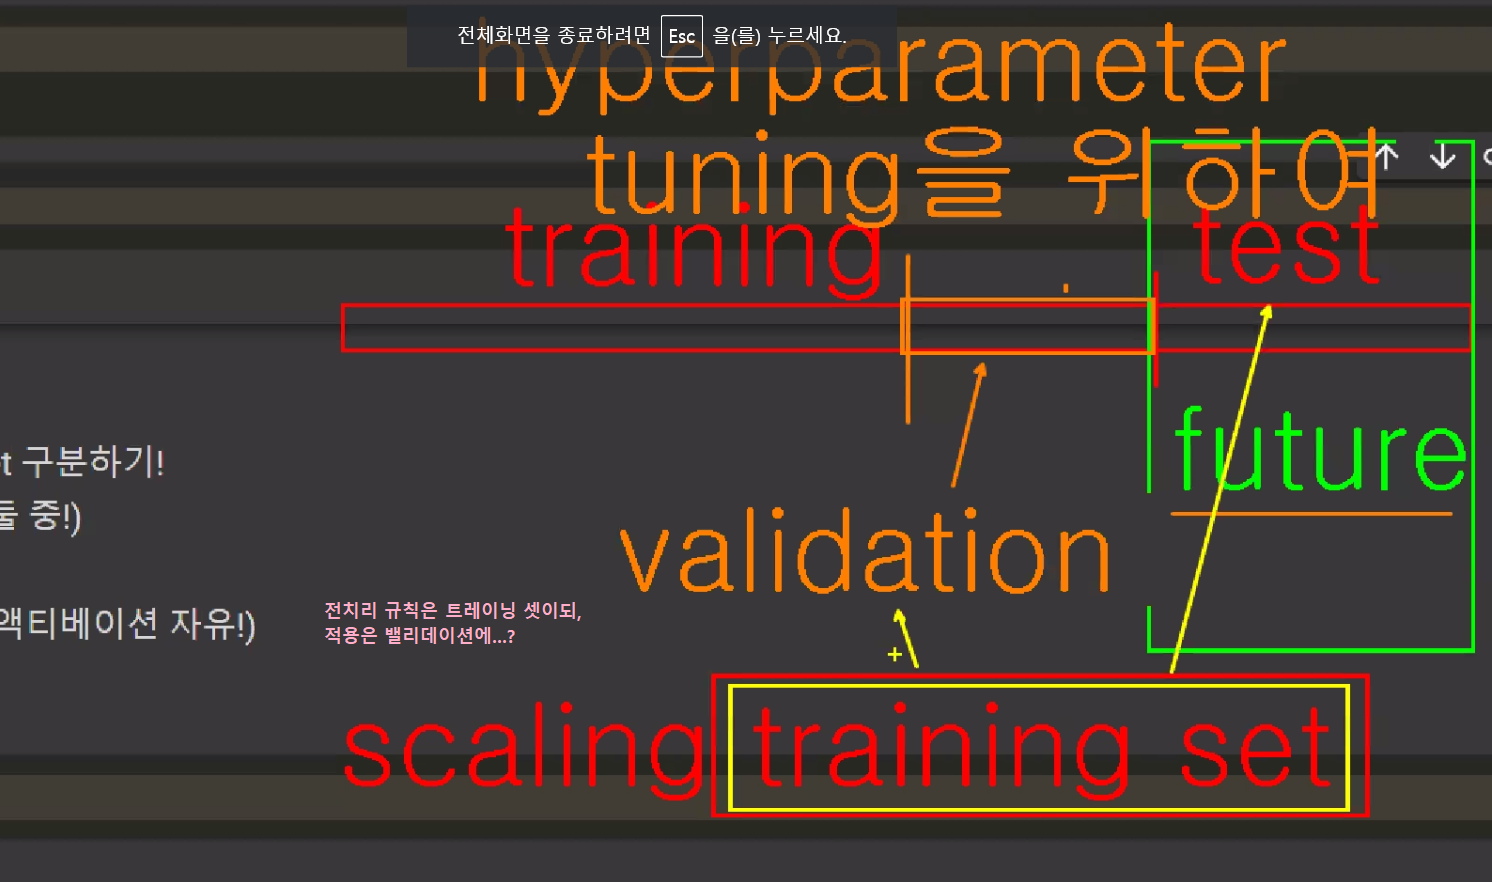

In [50]:
# 2. scaling (min-max, standardiztion 둘 중!)
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# max_n, min_n = x_train.max(), x_train.min() 내가 직접 한 방법
# max_n, min_n

In [21]:
# x_train = (x_train - max_n) / (max_n - min_n)
# x_test = (x_test - max_n) / (max_n - min_n)

In [51]:
mm_scaler, sd_scaler = MinMaxScaler(), StandardScaler()

In [52]:
import pandas as pd

pd.DataFrame(x_train, columns=wine.feature_names).describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,144.000000,144.000000,144.000000,144.0000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,13.022778,2.332917,2.372500,19.3625,99.902778,2.336806,2.100764,0.356250,1.595139,5.003819,0.957889,2.679097,756.263889
std,0.798531,1.108230,0.269211,3.3394,13.593663,0.638590,0.992632,0.122068,0.551479,2.303946,0.227866,0.715818,322.009316
min,11.450000,0.890000,1.700000,11.2000,70.000000,0.980000,0.340000,0.130000,0.410000,1.740000,0.480000,1.270000,290.000000
25%,12.355000,1.610000,2.227500,16.9500,89.000000,1.772500,1.272500,0.260000,1.257500,3.240000,0.777500,2.057500,500.000000
50%,13.050000,1.845000,2.360000,19.0000,98.000000,2.415000,2.245000,0.340000,1.560000,4.550000,0.960000,2.845000,679.000000
75%,13.695000,3.000000,2.542500,21.0000,107.250000,2.850000,2.892500,0.430000,1.950000,6.025000,1.122500,3.230000,986.250000
max,14.750000,5.800000,3.230000,30.0000,151.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.450000,4.000000,1680.000000


In [53]:
x_train_mm = mm_scaler.fit_transform(x_train)
x_train_sd = sd_scaler.fit_transform(x_train)

In [55]:
pd.DataFrame(x_train_mm, columns=wine.feature_names).describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,0.476599,0.293873,0.439542,0.434176,0.369170,0.467864,0.371469,0.426887,0.373861,0.289860,0.492669,0.516153,0.335442
std,0.241979,0.225709,0.175955,0.177628,0.167823,0.220203,0.209416,0.230316,0.173968,0.204613,0.234913,0.262204,0.231661
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.274242,0.146640,0.344771,0.305851,0.234568,0.273276,0.196730,0.245283,0.267350,0.133215,0.306701,0.288462,0.151079
50%,0.484848,0.194501,0.431373,0.414894,0.345679,0.494828,0.401899,0.396226,0.362776,0.249556,0.494845,0.576923,0.279856
75%,0.680303,0.429735,0.550654,0.521277,0.459877,0.644828,0.538502,0.566038,0.485804,0.380551,0.662371,0.717949,0.500899
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
pd.DataFrame(x_train_sd, columns=wine.feature_names).describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02,1.440000e+02
mean,2.146431e-15,3.022274e-16,1.406282e-15,-1.881211e-16,4.749287e-16,-1.094803e-15,2.467162e-17,-8.018277e-17,8.264994e-16,8.465451e-16,-1.005369e-15,-9.806970e-16,-7.401487e-17
std,1.003490e+00,1.003490e+00,1.003490e+00,1.003490e+00,1.003490e+00,1.003490e+00,1.003490e+00,1.003490e+00,1.003490e+00,1.003490e+00,1.003490e+00,1.003490e+00,1.003490e+00
min,-1.976465e+00,-1.306545e+00,-2.506755e+00,-2.452833e+00,-2.207437e+00,-2.132107e+00,-1.780024e+00,-1.859949e+00,-2.156522e+00,-1.421566e+00,-2.104557e+00,-1.975384e+00,-1.453037e+00
25%,-8.391772e-01,-6.545931e-01,-5.404900e-01,-7.249568e-01,-8.048480e-01,-8.867592e-01,-8.373240e-01,-7.912490e-01,-6.143799e-01,-7.682367e-01,-7.944079e-01,-8.714040e-01,-7.986053e-01
50%,3.420939e-02,-4.418032e-01,-4.659396e-02,-1.089313e-01,-1.404639e-01,1.228761e-01,1.458139e-01,-1.335875e-01,-6.393999e-02,-1.976624e-01,9.297043e-03,2.325756e-01,-2.407805e-01
75%,8.447624e-01,6.040366e-01,6.336779e-01,4.920691e-01,5.423753e-01,8.064423e-01,8.003966e-01,6.062817e-01,6.457181e-01,4.447782e-01,7.249247e-01,7.722990e-01,7.167148e-01
max,2.170551e+00,3.139406e+00,3.196346e+00,3.196571e+00,3.772020e+00,2.425002e+00,3.011825e+00,2.497059e+00,3.611725e+00,3.482760e+00,2.167190e+00,1.851746e+00,2.878676e+00


In [57]:
val_x_sd = sd_scaler.transform(x_val)
test_x_sd = sd_scaler.transform(x_test)

In [58]:
val_x_sd, test_x_sd

(array([[-6.44393143e-01, -9.89623983e-01, -4.56620839e-01,
         -5.59681684e-01, -1.10012983e+00, -5.29261875e-01,
         -1.53739899e+00,  2.00381247e+00, -6.28027203e-01,
          1.94335237e-01, -9.15514125e-01, -1.63893272e+00,
         -3.31154374e-01],
        [-2.02673163e+00, -1.44236847e+00,  4.75258424e-01,
          4.92069131e-01, -8.78668467e-01,  2.25018142e-01,
         -9.17567232e-02,  5.24074030e-01, -2.82296332e-01,
         -8.37925131e-01,  6.25837822e-01, -5.17429605e-01,
         -1.00428375e+00],
        [-2.50426674e+00, -7.45141962e-01, -6.42996692e-01,
          6.42319248e-01, -1.10012983e+00,  1.93589808e-01,
          6.99934606e-02,  1.34615094e+00,  7.54896280e-01,
         -1.35187755e+00,  3.31219407e+00,  2.67622574e-01,
         -1.08842492e+00],
        [ 5.87144781e-01, -6.09318617e-01, -4.93896010e-01,
          1.39356983e+00, -9.52488922e-01, -7.17831879e-01,
         -2.63616293e-01, -7.09041334e-01, -1.02834716e+00,
         -5.5046021

In [17]:
# 3. y에 대한 전처리
y_train

array([1, 1, 1, 1, 1, 0, 0, 2, 1, 2, 1, 0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 0,
       2, 0, 1, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2, 0, 1, 1, 2, 2, 0, 1, 0,
       2, 0, 2, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 2, 0, 1, 0, 1, 1, 0, 2, 2, 2, 1, 1, 2, 0, 0, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 1, 0, 0, 2, 1, 2, 1, 2, 1, 0, 0, 1, 0,
       0, 1, 2, 2, 1, 2, 2, 1, 0, 1, 0, 0])

In [18]:
from tensorflow.keras.utils import to_categorical

In [24]:
class_n = len(set(y))
print(class_n)

3


In [23]:
y_train = to_categorical(y_train, class_n)
y_val = to_categorical(y_val, class_n)
y_test = to_categorical(y_test, class_n)

In [33]:
x_train.shape, y_train.shape

((144, 13), (144, 3))

In [27]:
import tensorflow as tf 
from tensorflow import keras

In [29]:
# 4. 히든 레이어 최소 2개 쓰기* 노드와 엑티베이션 자유

### Functional API
# 1. 세션 클리어
keras.backend.clear_session()
# 2. 레이어 사슬처럼 엮기
il = keras.layers.Input(shape=(13,))
hl = keras.layers.Dense(64, activation='relu', name='hidden1')(il) # 초창기 활성화 함수 시그모이드였음 어떤 문제가 있어 시그모이드를 안 쓰고 렐루를 쓰기 시작함(딥러닝 역사)
hl = keras.layers.Dense(32, activation='relu', name='hidden2')(hl)
ol = keras.layers.Dense(3, activation='softmax', name='output')(hl)
# 3. 모델의 시작/끝 지정
model = keras.models.Model(il, ol)
# 4. 컴파일
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer = 'adam')
# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 hidden1 (Dense)             (None, 64)                896       
                                                                 
 hidden2 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 3)                 99        
                                                                 
Total params: 3,075
Trainable params: 3,075
Non-trainable params: 0
_________________________________________________________________


In [30]:
# 5. early stopping, validation data
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
es = EarlyStopping(monitor='val_loss', # 관측 대상
                   min_delta = 0, # 임계값
                   patience = 5, # 관측 대상의 성능 개선이 발생하지 않을 때, 얼마나 더 지켜볼 것인지
                   verbose=1,
                   restore_best_weights=True # 최적의 epoch 가중치 적용
                   ) 

In [66]:
# 학습
model.fit(x_train_sd, y_train, epochs=1000, verbose=1, callbacks=[es], validation_data=(x_val, y_val))

Epoch 1/1000


ValueError: in user code:

    File "c:\ProgramData\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\ProgramData\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\ProgramData\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\ProgramData\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\ProgramData\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "c:\ProgramData\anaconda3\envs\tf\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\ProgramData\anaconda3\envs\tf\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\ProgramData\anaconda3\envs\tf\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\ProgramData\anaconda3\envs\tf\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\ProgramData\anaconda3\envs\tf\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 3) are incompatible


In [59]:
y_pred = model.predict(test_x_sd)

1/1 [==============================] - 0s 45ms/step


In [61]:
y_pred[:5]

array([[0.29897958, 0.4708373 , 0.23018323],
       [0.29769155, 0.38682067, 0.31548774],
       [0.43166152, 0.3909945 , 0.17734398],
       [0.46401158, 0.3810813 , 0.15490702],
       [0.35236442, 0.35376647, 0.2938692 ]], dtype=float32)

In [62]:
test_x_sd[:5]

array([[-0.26739174, -0.02075079,  0.10250672,  1.39356983, -0.14046392,
        -1.86496607, -1.02182028, -0.70904133, -1.39227439,  0.30322346,
        -1.31186177, -1.84921455, -0.61162495],
       [-1.28529553, -1.27938045, -1.3885001 , -0.10893133, -1.02630938,
         0.13073314,  0.16097794, -0.46241826, -0.30049269, -1.09054581,
         1.85891938,  0.6180923 , -1.49043274],
       [-0.97112769,  1.40086689, -0.64299669, -0.25918145,  0.89302244,
        -1.50354023, -1.33521126, -0.54462595, -0.82818718,  1.39646123,
        -1.3559004 , -0.95201206,  0.30769526],
       [-0.82032713, -1.26127067, -3.77411102, -2.63313329, -0.87866847,
        -0.56069021, -1.54750838, -0.62683364, -2.13832522, -1.33009991,
         0.40564469, -1.20435026, -0.73627853],
       [ 2.27108439, -0.6274284 , -0.7548222 , -1.6114325 , -0.21428438,
         0.72787149,  0.88885377, -0.54462595,  0.70030719,  0.08544701,
         0.53776057,  0.239585  ,  0.8997998 ]])